In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#Cargamos la base de datos 'dataset_unificado'
df_merged = pd.read_csv("C:/Users/guard/OneDrive/Desktop/Henry Data Science/Proyecto MLOps/Datasets Procesados/dataset_unificado.csv", sep=",")

df_merged.head(2)

,budget,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western,genres_1,cast_names,directing_names
0,30000000.0,862,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,...,0,0,0,0,0,0,0,"Animation, Comedy, FamilyAnimation, Comedy, Fa...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Roman Figun, Desirée Mourad"
1,65000000.0,8844,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,...,0,0,0,0,0,0,0,"Adventure, Fantasy, FamilyAdventure, Fantasy, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston


In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45409 entries, 0 to 45408
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   budget                                 45409 non-null  float64
 1   id                                     45409 non-null  int64  
 2   original_language                      45409 non-null  object 
 3   popularity                             45409 non-null  float64
 4   release_date                           45409 non-null  object 
 5   revenue                                45409 non-null  float64
 6   runtime                                45409 non-null  float64
 7   title                                  45409 non-null  object 
 8   vote_average                           45409 non-null  float64
 9   vote_count                             45409 non-null  float64
 10  release_year                           45409 non-null  int64  
 11  re

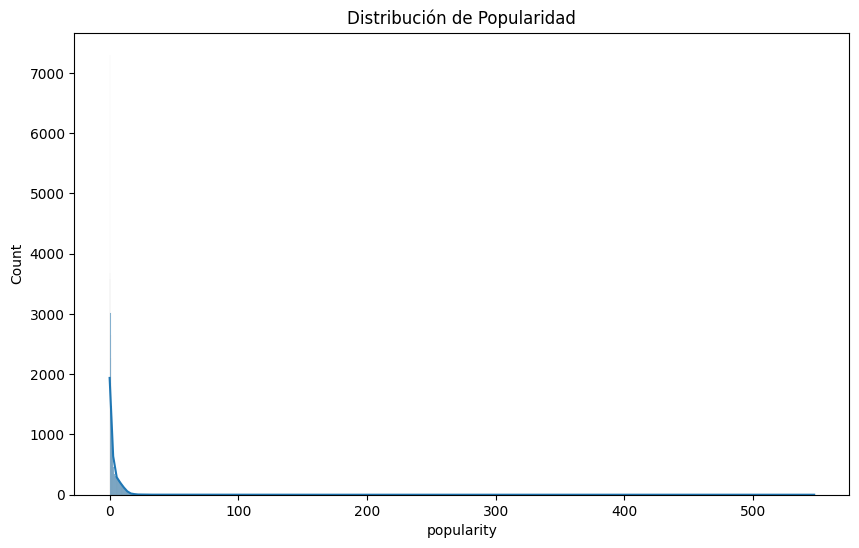

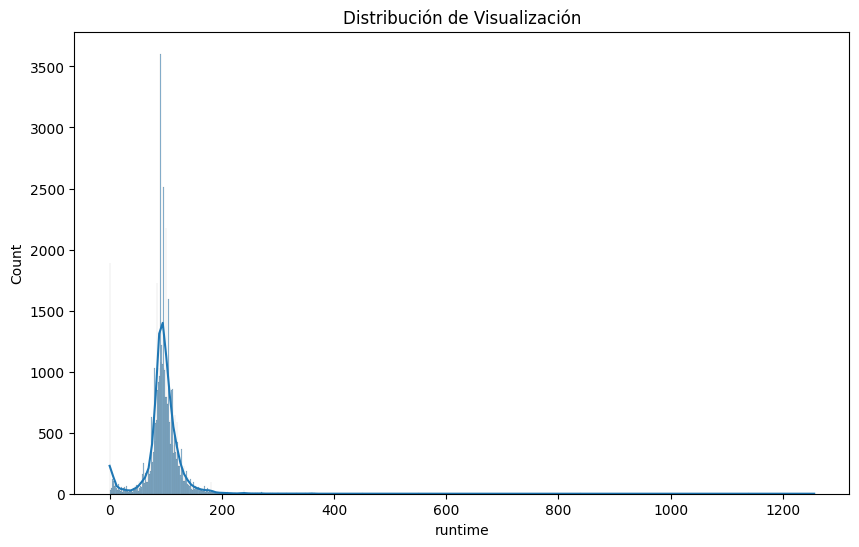

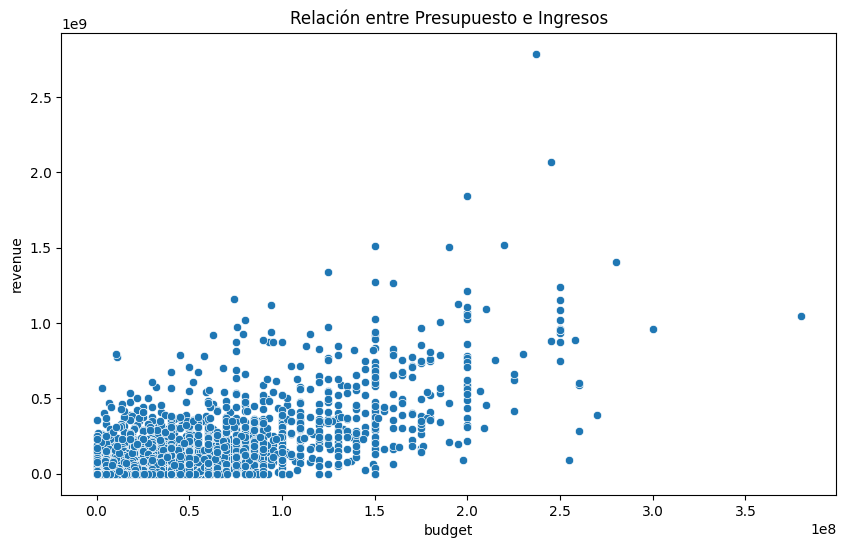

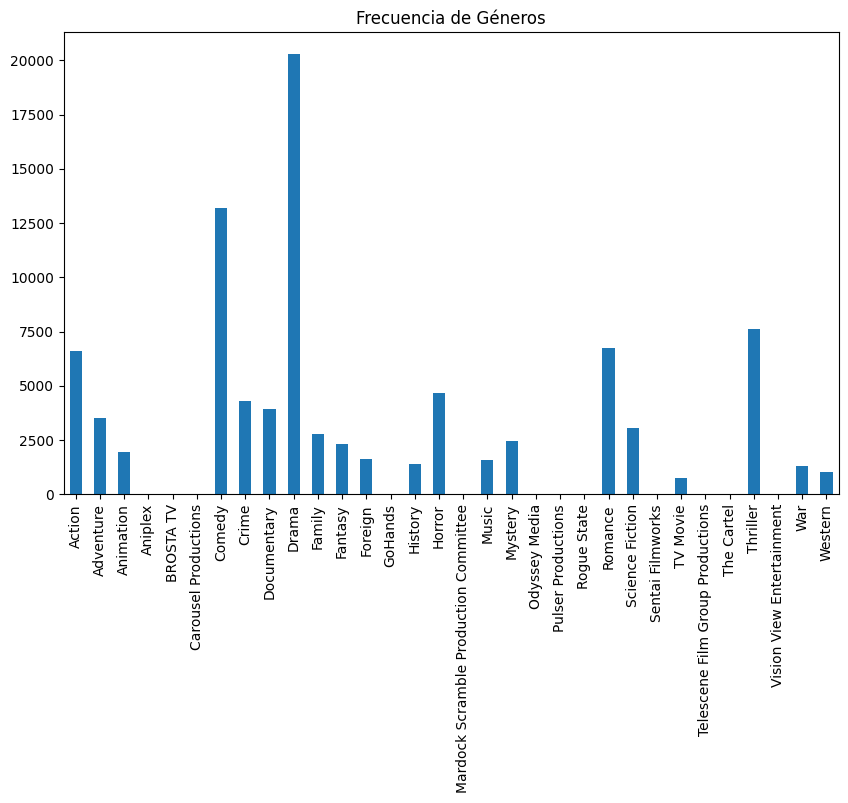

In [25]:
# Histograma para popularidad
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['popularity'], kde=True)
plt.title('Distribución de Popularidad')
plt.show()

# Histograma para runtime
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['runtime'], kde=True)
plt.title('Distribución de Visualización')
plt.show()

# Scatter Plot para budget vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_merged)
plt.title('Relación entre Presupuesto e Ingresos')
plt.show()

# Gráfico de Barras para el recuento de géneros
plt.figure(figsize=(10, 6))
df_merged[['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee', 'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie', 'Telescene Film Group Productions', 'The Cartel', 'Thriller', 'Vision View Entertainment', 'War', 'Western']].sum().plot(kind='bar')
plt.title('Frecuencia de Géneros')
plt.show()


In [26]:
# Obtener las 5 películas con mayor popularity
top_popularity = df_merged[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(5)

# Obtener las 5 películas con mayor runtime
top_runtime = df_merged[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(5)

# Obtener las 5 películas con mayor budget
top_budget = df_merged[['title', 'budget']].sort_values(by='budget', ascending=False).head(5)

# Obtener las 5 películas con mayor revenue
top_revenue = df_merged[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 películas con mayor Popularidad:")
print(top_popularity)

print("\nTop 5 películas con mayor Duración (Runtime):")
print(top_runtime)

print("\nTop 5 películas con mayor Presupuesto (Budget):")
print(top_budget)

print("\nTop 5 películas con mayores Ingresos (Revenue):")
print(top_revenue)

Top 5 películas con mayor Popularidad:
                      title  popularity
30698               Minions  547.488298
33349          Wonder Woman  294.337037
42184  Beauty and the Beast  287.253654
43600           Baby Driver  228.032744
24459            Big Hero 6  213.849907

Top 5 películas con mayor Duración (Runtime):
                                title  runtime
24182                      Centennial   1256.0
19980                            Jazz   1140.0
40906                        Baseball   1140.0
13788           Berlin Alexanderplatz    931.0
13974  Heimat: A Chronicle of Germany    925.0

Top 5 películas con mayor Presupuesto (Budget):
                                             title       budget
17148  Pirates of the Caribbean: On Stranger Tides  380000000.0
11841     Pirates of the Caribbean: At World's End  300000000.0
26561                      Avengers: Age of Ultron  280000000.0
11079                             Superman Returns  270000000.0
16155                  

In [27]:
# Eliminar columnas de géneros no representativos para evaluar la correlación

df_dropped = df_merged.drop(columns=['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands', 'Mardock Scramble Production Committee', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Sentai Filmworks', 'Telescene Film Group Productions', 'The Cartel', 'Vision View Entertainment'])


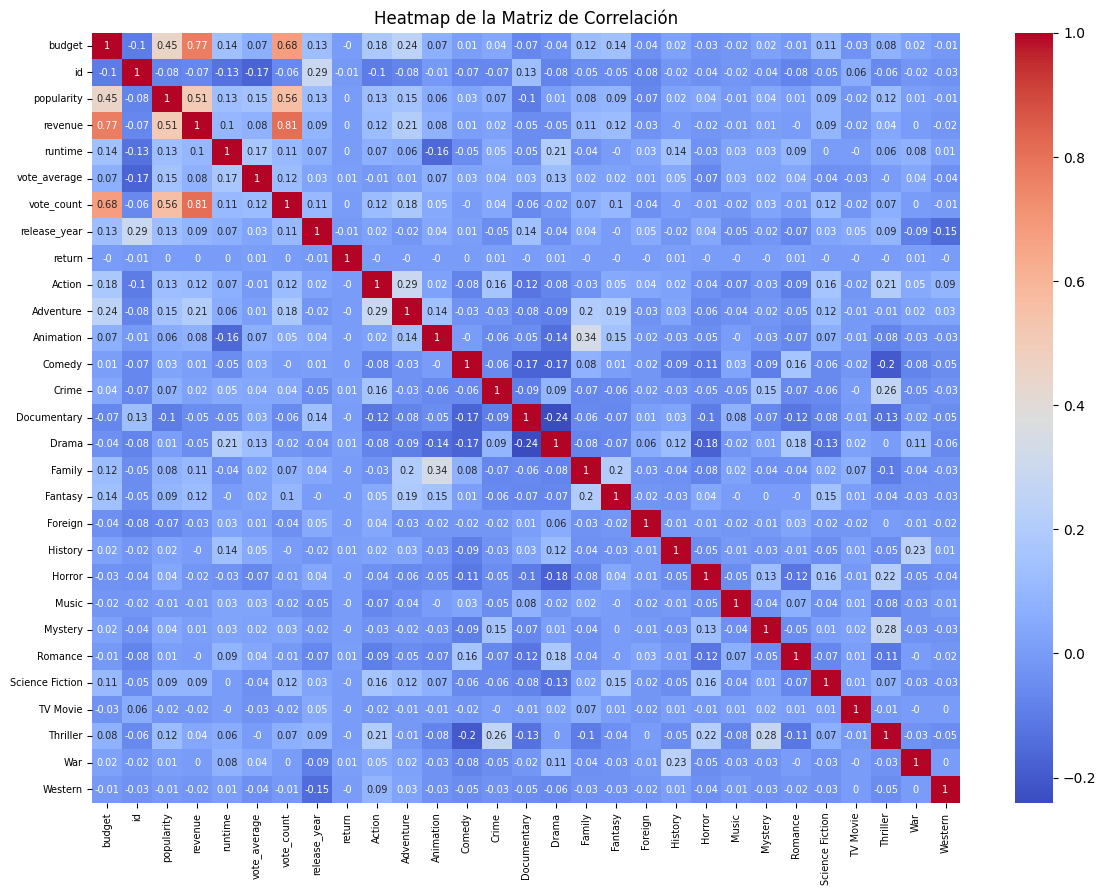

In [28]:
# Seleccionar solo las columnas numéricas
numeric_df = df_dropped.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr().round(2)

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7}, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación')
plt.xticks(fontsize=7)  # Ajustar el tamaño de las etiquetas del eje x
plt.yticks(fontsize=7)  # Ajustar el tamaño de las etiquetas del eje y
plt.show()


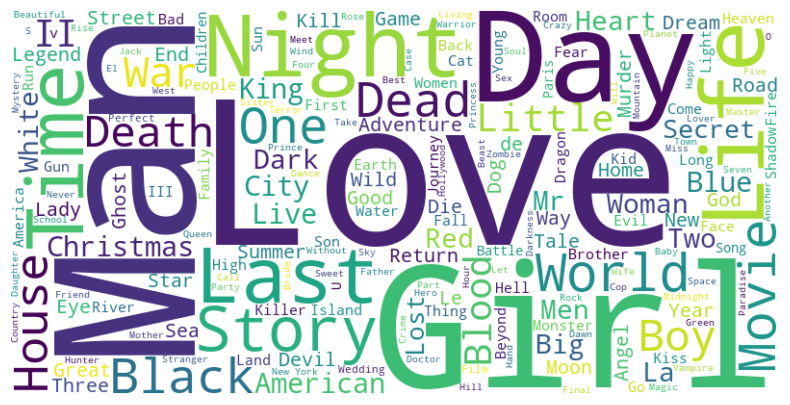

In [30]:
# Concatenar todos los títulos en una sola cadena
text = ' '.join(df_merged['title'].astype(str).tolist())

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
